In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
eps = np.finfo(float).eps
from numpy import log2 as log
import sys

adultdata = pd.read_csv('adult.data', names=["Age","Workclass","FNLWGT","Education","Education-num",\
                                             "Marital_status","Occupation","Relationship","Race","Sex",\
                                             "Capital-gain","Capital-loss","Hours-per-week","Native-country",\
                                             "Class"])
attName = ["Age","Workclass","FNLWGT","Education-num",\
           "Marital_status","Occupation","Race","Sex",\
           "Capital-gain","Capital-loss","Hours-per-week","Native-country"]
adultdata

,Age,Workclass,FNLWGT,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
adulttest = pd.read_csv('adult.test', names=["Age","Workclass","FNLWGT","Education","Education-num",\
                                             "Marital_status","Occupation","Relationship","Race","Sex",\
                                            "Capital-gain","Capital-loss","Hours-per-week","Native-country",\
                                            "Class"])
adulttest = adulttest.drop([0])
adulttest

,Age,Workclass,FNLWGT,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [3]:
import random
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [4]:
adultdatatrain, adultdatapostpruning = train_test_split(adultdata, 0.33)

In [5]:
adultdatatrain

,Age,Workclass,FNLWGT,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
adultdatapostpruning

,Age,Workclass,FNLWGT,Education,Education-num,Marital_status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
29959,43,Private,69333,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,<=50K
2857,28,?,157813,11th,7,Divorced,?,Unmarried,White,Female,0,0,58,Canada,<=50K
19690,38,Self-emp-not-inc,334366,Some-college,10,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,15,United-States,<=50K
7238,29,Private,183009,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Other,Female,0,1590,40,United-States,<=50K
2710,50,Private,92079,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32045,20,Private,184045,Some-college,10,Never-married,Sales,Unmarried,Black,Female,0,0,30,United-States,<=50K
15924,72,Private,33404,10th,6,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,United-States,<=50K
19417,44,Private,151985,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,24,United-States,>50K
27911,21,Private,245572,9th,5,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K


In [7]:
# Calculate Entropy of dataset
def findEntropy(df):
    #print('Calculating entropy..........')
    #print(f'df (findEntropy): \n{df}')
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()

    for value in values:
        fraction = df[Class].value_counts()[value] / len(df[Class])
        entropy += -fraction * np.log2(fraction)
    return entropy

In [8]:
# Calculate Entropy by attribute
def findEntropyAttribute(df,attribute):
    #print('Calculating entropy by attribute..........')  
    #print(f'df (findEntropy): \n{df}')
    #print('attribute (findEntropyAttribute): ', attribute) 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name

    target_variables = df[Class].unique() #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)

    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute] == variable][df[Class] == target_variable])
            den = len(df[attribute][df[attribute] == variable])
            fraction = num / (den+eps)
            entropy += -fraction * log(fraction+eps)
        fraction2 = den / len(df)
        entropy2 += -fraction2 * entropy

    return abs(entropy2)

In [9]:
# Calculate information gain and return the best splitting node (feature)
def infoGain(df):
    #print('Calculate information gain ..........')
    #print(f'df (findEntropy): \n{df}')
    IG = []
    for key in df.keys()[:-1]:
        IG.append(findEntropy(df) - findEntropyAttribute(df,key))

    return df.keys()[:-1][np.argmax(IG)]

In [10]:
def giniImpurity2(valueCounts):
    #print('Calculating gini impurity ..........')
    #print(f'df (findEntropy): \\n{df}')
    #print('valueCounts.keys(): ', valueCounts.keys())
    n = valueCounts.sum()
    p_sum = 0
    for key in valueCounts.keys():
        p_sum = p_sum  +  (valueCounts[key] / n ) * (valueCounts[key] / n )
        gini = 1 - p_sum

    return gini

In [11]:
# Calculating  gini impurity for the attiributes
def giniSplitAtt2(df, attName):
    #print('Calculating gini impurity by attribute..........')
    #print(f'df (giniSplitAtt2): \\n{df}')
    #print('attName (giniSplitAtt2): ', attName)
    attValues = df[attName].value_counts()
    gini_A = 0
    for key in attValues.keys():
        dfKey = df[className][df[attName] == key].value_counts()
        numOfKey = attValues[key]
        n = df.shape[0]
        gini_A = gini_A + (( numOfKey / n) * giniImpurity2(dfKey))

    return gini_A

In [12]:
def giniIndex2(df, attributeNames):
    #print('Calculate gini index2 ..........')
    #print(f'df (findEntropy): \\n{df}')
    #print('attributeNames (giniIndex2): ', attributeNames)
    giniAttribute = {}
    minValue = sys.maxsize
    for key in attributeNames:
        #print('=====================================> key (giniIndex2): ', key)
        giniAttribute[key] = giniSplitAtt2(df, key)
        if giniAttribute[key] < minValue:
            minValue = giniAttribute[key]
            selectedAttribute = key
        #print(f'Gini for {key} is {giniAttribute[key]:.3f}')
    minValue = min(giniAttribute.values())
    #selectedAttribute = min(giniAttribute.keys())
    #print('^^^^^^^^^^^^^^^^ minValue (giniIndex2): ', minValue)
    #print('^^^^^^^^^^^^^^^^ giniIndex2 methods is returning (giniIndex2):', selectedAttribute)
    return selectedAttribute

In [13]:
def getSubtable(df, node, value):
    return df[df[node] == value].reset_index(drop=True)

In [14]:
print(findEntropy(adultdatatrain))

0.7916055274436617


In [15]:
print(findEntropy(adultdatapostpruning))

0.8058870769537714


In [16]:
print(findEntropy(adulttest))

0.788708184990964


In [17]:
print(findEntropyAttribute(adultdatatrain, 'Age'))

0.6964351954649428


In [18]:
print(findEntropyAttribute(adultdatapostpruning, 'Age'))

0.695114351673674


In [19]:
print(findEntropyAttribute(adulttest, 'Age'))

0.6904502539000037


In [20]:
print(infoGain(adultdatatrain))

FNLWGT


In [21]:
def buildTree(df,model,tree=None): 
    # print('@@@@@@@@@@@@@@@@@ Building a classification tree................................')
    # print(f'DataFrame: \n{df}')
    # print('tree (buildTree): ', tree)
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    # print('Class (buildTree): ', Class)
    #Here we build our decision tree

    #Get attribute with maximum information gain
    #print('model (buildTree): infoGain')

    if model == 'infoGain':
        #print('Calling infoGain(df)')
        node = infoGain(df)
    else:
        #print('Calling giniIndex2')
        node = giniIndex2(df, attName)
       
    # print('node (buildTree): ', node)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValueBT = np.unique(df[node])
    # print('attValue (buildTree): ', attValueBT)
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree = {}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValueBT:
        # print('value (buildTree): ', value)
        subtable = getSubtable(df,node,value)

        clValue,counts = np.unique(subtable[className],return_counts=True)

        if len(counts) == 1: # Checking purity of subset
            # print('##########################################********** Recursive call 1 **********')
            # print('node (buildTree): ', node)
            # print('value (buildTree): ', tree)
            tree[node][value] = clValue[0]                                                    
        else:
            # print('##########################################********** Recursive call 2 **********')
            # print('node (buildTree): ', node)
            # print('value (buildTree): ', tree)
            # print(f'subtable (buildTree): \n{subtable}')
            tree[node][value] = buildTree(subtable, model) # Calling the function recursively 
    # print('############################################ tree to return (buildTree) ----->: ', tree)           
    return tree

In [22]:
import pprint
className = 'Education'
#className = 'creditRating'
print('Target Class: ', className)
model = 'gini'
#model = 'infoGain'
t=buildTree(adultdatatrain, model)
pprint.pprint(t)

Target Class:  Education
{'Education-num': {1: ' Preschool',
                   2: ' 1st-4th',
                   3: ' 5th-6th',
                   4: ' 7th-8th',
                   5: ' 9th',
                   6: ' 10th',
                   7: ' 11th',
                   8: ' 12th',
                   9: ' HS-grad',
                   10: ' Some-college',
                   11: ' Assoc-voc',
                   12: ' Assoc-acdm',
                   13: ' Bachelors',
                   14: ' Masters',
                   15: ' Prof-school',
                   16: ' Doctorate'}}


In [23]:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = adultdatatrain[attribute_name].value_counts()
    gini_A = 0 
    # print('class_name: ', className)
    # print('attribute_values: ', attribute_values)
    for key in attribute_values.keys():
        df_k = adultdatatrain[className][adultdata[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = adultdatatrain.shape[0]
        gini_A = gini_A + (( n_k / n) * giniImpurity2(df_k))
    return gini_A

#attribute_names =  ['age', 'income', 'student', 'creditRating']
gini_attiribute ={}
for key in attName:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for Age is 0.787
Gini for Workclass is 0.804
Gini for FNLWGT is 0.200
Gini for Education-num is 0.000
Gini for Marital_status is 0.805
Gini for Occupation is 0.760
Gini for Race is 0.807
Gini for Sex is 0.808
Gini for Capital-gain is 0.800
Gini for Capital-loss is 0.803
Gini for Hours-per-week is 0.798
Gini for Native-country is 0.802


In [24]:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.0 
The maximum value of Gini Gain     : 1.0 
The selected attiribute is:  Age


# Classification

In [25]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [26]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

In [27]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:   # empty data
        mse = 0
        
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)
    
    return mse


def calculate_overall_metric(data_below, data_above, metric_function):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_metric =  (p_data_below * metric_function(data_below) 
                     + p_data_above * metric_function(data_above))
    
    return overall_metric


def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [28]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [29]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [30]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [31]:
def predict_example(example, tree):
    
    # tree is just a root node
    if not isinstance(tree, dict):
        return tree
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    if str(example[feature_name]) == value:
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [32]:
def make_predictions(df, tree):
    
    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()
        
    return predictions

In [33]:
def classify_example(example, tree):
    if isinstance(tree, str):
        return tree
    else:
        question = list(tree.keys())[0]
    
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] == value:
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [34]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["Class"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [35]:
tree = decision_tree_algorithm(adultdatatrain, max_depth=3)

In [36]:
pprint.pprint(tree)

{'Relationship <=  Husband': [{'Education-num <= 12': [{'Capital-gain <= 5013': [' '
                                                                                 '<=50K',
                                                                                 ' '
                                                                                 '>50K']},
                                                       ' >50K']},
                              {'Capital-gain <= 6849': [' <=50K', ' >50K']}]}


In [37]:
print(calculate_accuracy(adultdatapostpruning, tree))

0.24662633783154955


# Post pruning

In [38]:
def filter_df(df, question):
    feature, comparison_operator, value = question.split()
    
    df_yes = df[df[feature].astype(str) == value]
    df_no  = df[df[feature].astype(str) != value]
    
    return df_yes, df_no


In [39]:
def determine_leaf(df_train):
    return df_train.Class.value_counts().index[0]


In [40]:
def determine_errors(df_val, tree):
    predictions = make_predictions(df_val, tree)
    actual_values = df_val.Class
    
    # number of errors
    return sum(predictions != actual_values)


In [41]:
def pruning_result(tree, df_train, df_val):
    
    leaf = determine_leaf(df_train)
    errors_leaf = determine_errors(df_val, leaf)
    errors_decision_node = determine_errors(df_val, tree)

    if errors_leaf <= errors_decision_node:
        return leaf
    else:
        return tree


In [42]:
def post_pruning(tree, df_train, df_val):
    
    question = list(tree.keys())[0]
    yes_answer, no_answer = tree[question]

    # base case
    if not isinstance(yes_answer, dict) and not isinstance(no_answer, dict):
        return pruning_result(tree, df_train, df_val)
        
    # recursive part
    else:
        df_train_yes, df_train_no = filter_df(df_train, question)
        df_val_yes, df_val_no = filter_df(df_val, question)
        
        if isinstance(yes_answer, dict):
            yes_answer = post_pruning(yes_answer, df_train_yes, df_val_yes)
            
        if isinstance(no_answer, dict):
            no_answer = post_pruning(no_answer, df_train_no, df_val_no)
        
        tree = {question: [yes_answer, no_answer]}
    
        return pruning_result(tree, df_train, df_val)

In [43]:
metrics = {"max_depth": [], "acc_tree": [], "acc_tree_pruned": []}
for n in range(10, 25):
    df_train, df_test = train_test_split(adultdatapostpruning, test_size=0.15)
    df_train, df_val = train_test_split(df_train, test_size=0.15)

    tree = decision_tree_algorithm(df_train, max_depth=n)
    tree_pruned = post_pruning(tree, df_train, df_val)
    
    metrics["max_depth"].append(n)
    metrics["acc_tree"].append(calculate_accuracy(df_test, tree))
    metrics["acc_tree_pruned"].append(calculate_accuracy(df_test, tree_pruned))
    
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.set_index("max_depth")

<AxesSubplot:xlabel='max_depth'>

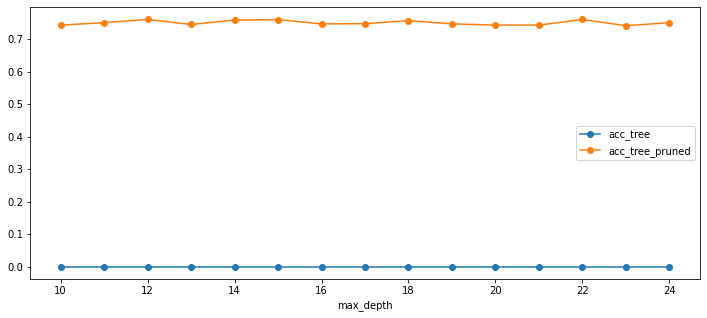

In [44]:
df_metrics.plot(figsize=(12, 5), marker="o")